## Causality Worked Example
#### Author: Karthik Prakash [002728828]

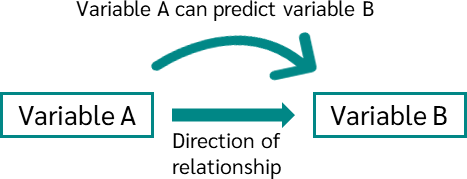

## Table Of Contents:
#### 1) Abstract
#### 2) Introduction
#### 3) About the code
#### 4) Results
#### 5) Visualization
#### 6) Conclusion

## Abstract:
#### In this notebook we have comprehensive demonstration of various methods for causal inference, which is the process of drawing a conclusion about a causal connection based on the conditions of the occurrence of an effect.
#### In this notebook we have used several libraries such as causalinference, dowhy, causalimpact, and econml to perform causal inference.

## Introduction:

#### We will be seeing about different libraries such as causalinference, dowhy, and econml

#### i) Causalinference:
#### The code begins by creating a synthetic dataset and fitting a causal model using the CausalModel class from the causalinference package. It then estimates the Average Treatment Effect (ATE) using Ordinary Least Squares (OLS) regression and prints the estimate. Finally, it visualizes the potential outcomes under treatment and control.
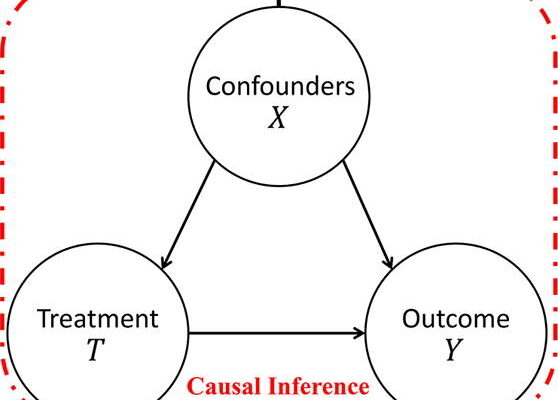

#### ii) DoWhy:
#### The code then fits another causal model on the same data using the CausalModel class from the dowhy package. It identifies the causal effect using the backdoor criterion, estimates the ATE using propensity score matching, and prints the estimate. It also performs a robustness check by adding a random common cause and prints the results.
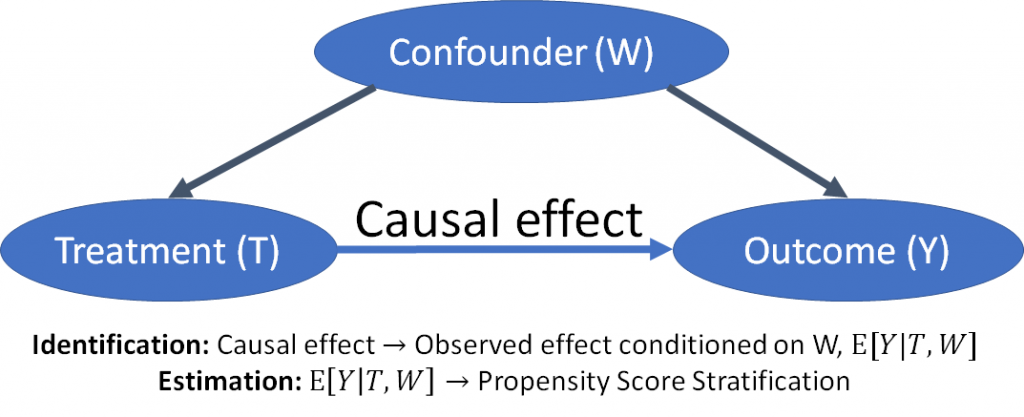

#### iii) EconML:
#### Finally, the code fits a causal model using the LinearDML class from the econml package. It splits the data into training and test sets, fits the model, estimates the causal effect, and prints the estimate.
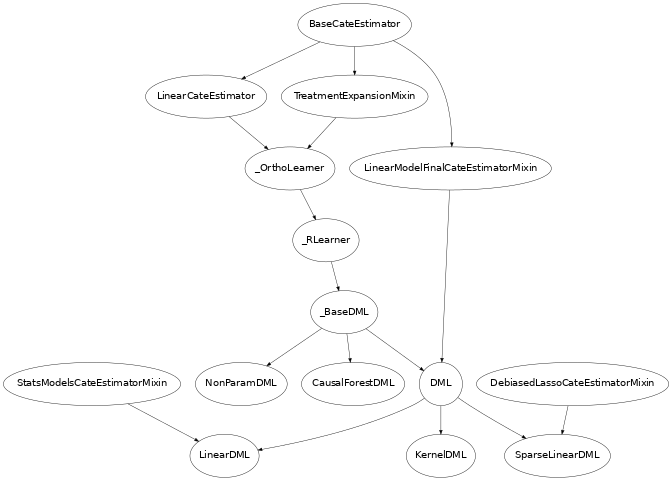


In [141]:
!pip install numpy pandas causalinference matplotlib dowhy causalimpact sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [142]:
!pip install econml

In [143]:
import numpy as np
import pandas as pd
from causalinference import CausalModel
from dowhy import CausalModel as DoWhyCausalModel
from causalimpact import CausalImpact
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from econml.dml import LinearDML
import matplotlib.pyplot as plt
import dowhy.datasets

In [144]:
# create a dataset
np.random.seed(123)
N = 10000

#### -> np.random.seed() is used to ensure the reproducibility of the results. N is the number of samples


In [145]:
treatment_prob = 0.5  # probability of treatment
treatment = np.random.binomial(1, treatment_prob, N)

#### -> treatment_prob is the probability of treatment. treatment is a binary variable indicating whether each sample received the treatment or not


In [146]:
Y0 = np.random.normal(0, 1, N)  # potential outcome when control
Y1 = Y0 + np.random.normal(1, 1, N)  # potential outcome when treated
y = Y1 * treatment + Y0 * (1 - treatment)  # observed outcome
X = np.random.normal(0, 1, (N, 2))  # covariates

#### -> Y0 and Y1 are the potential outcomes under control and treatment, respectively. y is the observed outcome, which is Y1 for treated samples and Y0 for control samples. X is a matrix of covariates.


In [147]:
# Create a dataframe
df = pd.DataFrame({'treatment': treatment, 'y': y, 'X1': X[:, 0], 'X2': X[:, 1]})

#### -> This line of code creates a pandas DataFrame from the synthetic data. The DataFrame df has four columns: ‘treatment’, ‘y’, ‘X1’, and ‘X2’.


In [148]:
# Fit the causal model
cm = CausalModel(
    Y=df['y'].values,
    D=df['treatment'].values,
    X=df[['X1', 'X2']].values
)

#### -> This block of code fits a causal model to the data. The CausalModel class is initialized with the outcome Y, the treatment indicator D, and the covariates X. The method est_via_ols(adj=1) estimates the Average Treatment Effect (ATE) using Ordinary Least Squares (OLS) regression, adjusting for the covariates.


In [149]:
cm.est_via_ols(adj=1)

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [150]:
# Print the causal effect
print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.987      0.024     40.591      0.000      0.939      1.035



#### -> # This line of code prints the estimated causal effect.


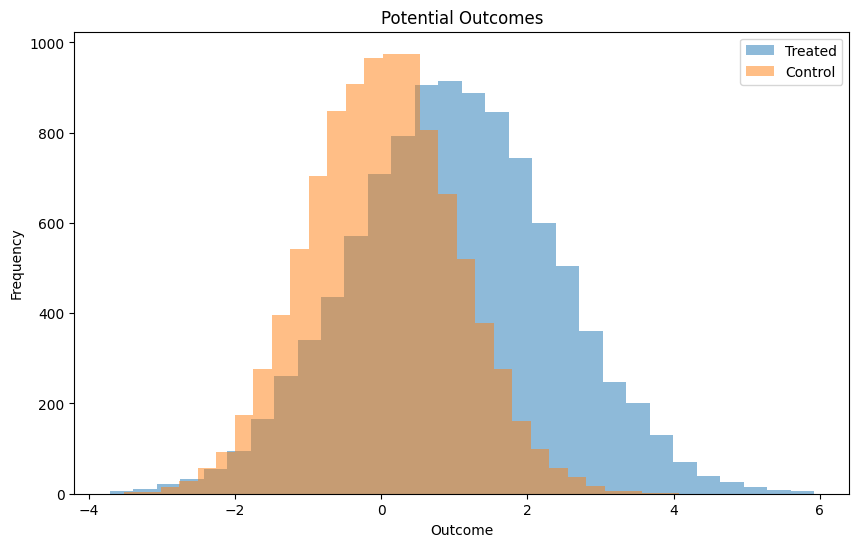

In [151]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.hist(Y1, bins=30, alpha=0.5, label='Treated')
plt.hist(Y0, bins=30, alpha=0.5, label='Control')
plt.legend(loc='upper right')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Potential Outcomes')
plt.show()

#### -> This block of code creates a histogram of the potential outcomes under treatment and control. The plt.figure(figsize=(10, 6)) line sets the size of the figure. The plt.hist lines create the histograms. The plt.legend(loc='upper right') line adds a legend to the plot. The plt.xlabel('Outcome'), plt.ylabel('Frequency'), and plt.title('Potential Outcomes') lines add labels to the x-axis, y-axis, and the title of the plot, respectively. The plt.show() line displays the plot.

In [152]:
# Create a causal model using DoWhy
model = DoWhyCausalModel(
    data=df,
    treatment='treatment',
    outcome='y',
    common_causes=['X1', 'X2']
)

#### -> The DoWhyCausalModel class is initialized with the DataFrame df, the treatment variable ‘treatment’, the outcome variable ‘y’, and the common causes ‘X1’ and ‘X2’.


In [153]:
# Identify the causal effect
identified_estimand = model.identify_effect()

#### -> identifies the causal effect using the backdoor criterion, which is a graphical criterion used for identifying causal effects from observational data.


In [154]:
# Estimate the causal effect
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_matching")

#### -> estimates the Average Treatment Effect (ATE) using propensity score matching. Propensity score matching is a statistical matching technique that attempts to estimate the effect of a treatment by accounting for the covariates that predict receiving the treatment.


In [155]:
# Print the causal effect
print("DoWhy estimates:")
print(estimate)

DoWhy estimates:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                  
────────────(E[y|X2,X1])
d[treatment]            
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y then P(y|treatment,X2,X1,U) = P(y|treatment,X2,X1)

## Realized estimand
b: y~treatment+X2+X1
Target units: ate

## Estimate
Mean value: 1.0095512352874416



In [156]:
# Refute the obtained estimate
refutation_results = model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print("Refutation results:")
print(refutation_results)

Refutation results:
Refute: Add a random common cause
Estimated effect:1.0095512352874416
New effect:1.0095512352874416
p value:1.0



#### -> These lines of code refute the obtained estimate by adding a random common cause and print the results. This is a robustness check that helps to ensure the reliability of the causal effect estimate.


In [157]:
# Now let's use EconML for the same data
# Create a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, random_state=123)
treatment = np.random.binomial(1, 0.5, size=10000)
effect = treatment - 0.5 * X[:, 0]
y = y + effect


In [159]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
    X, y, treatment, test_size=0.2, random_state=123
)


In [160]:
# Fit the causal model
model = LinearDML(model_y=RandomForestRegressor(), model_t=RandomForestRegressor())
model.fit(Y=y_train, T=treatment_train, X=X_train)

Co-variance matrix is underdetermined. Inference will be invalid!


In [161]:
# Estimate the causal effect
effect_estimates = model.effect(X_test)


In [162]:
# Print the causal effect
print("EconML estimates:")
print(effect_estimates)


EconML estimates:
[0.98509655 0.9936139  1.01568013 ... 0.97973962 0.98023146 0.97409838]


## Conclusion:
#### Causal inference is a complex but essential task in many fields. Python, with its rich ecosystem of data science libraries, provides a versatile environment to perform causal inference and draw meaningful conclusions from data.